In this homework assignment, you are requested to implement a full backprop algorithm using only *numpy*.

- We assume sigmoid activation across all layers.
- We assume a single value in the output layer

Submitted:

*   Hadar Pur
*   Rotem Feinblat



In [ ]:
import numpy as np
from sklearn.utils import shuffle

seed = np.random.seed(42)

The following class represents a simple feed forward network with multiple layers. The network class provides methods for running forward and backward for a single instance, throught the network. You should implement the methods (indicated with TODO), that performs forward and backward for an entire batch. Note, the idea is to use matrix multiplications, and not running standard loops over the instances in the batch.

In [ ]:
nn = MyNN(0.01, [3, 2, 1])

In [ ]:
nn.model_params

{'W_1': array([[ 0.04967142, -0.01382643,  0.06476885],
        [ 0.15230299, -0.02341534, -0.0234137 ]]),
 'W_2': array([[-0.04694744,  0.054256  ]]),
 'b_1': array([0.15792128, 0.07674347]),
 'b_2': array([-0.04634177])}

In [ ]:
x = np.random.randn(3)
y = np.random.randn(1)

y_hat = nn.forward_single_instance(x)
print(y_hat)

[0.48946]


In [ ]:
nn.backward_single_instance(y)

2
1


In [ ]:
def train(X, y, epochs, batch_size):
  '''
  Train procedure, please note the TODOs inside
  '''
  loss_vec=[]
  for e in range(1, epochs + 1):
    epoch_loss = 0
    shuffle_X, shuffle_y = shuffle(X.T, y.T, random_state=seed) # DONE: Shuffle
    batch_array = np.array_split(list(zip(shuffle_X, shuffle_y)), len(shuffle_X) // batch_size)
    batches = [zip(*batch) for batch in batch_array]  # DONE: divide to batches
    for X_b, y_b in batches:
      y_b = np.array(y_b)
      X_b = np.array(X_b)
      y_hat = nn.forward_batch(X_b)
      epoch_loss += nn.log_loss_batch(y_hat, y_b.T)
      nn.backward_batch(y_b)
      nn.update()
    loss_calc=epoch_loss/len(batches)
    loss_vec.append(loss_calc)
    # print(f'Epoch {e}, loss={epoch_loss/len(batches)}')
  return (loss_vec)

In [ ]:
class MyNN:
  def __init__(self, learning_rate, layer_sizes):
    '''
    learning_rate - the learning to use in backward
    layer_sizes - a list of numbers, each number repreents the nuber of neurons
                  to have in every layer. Therfore, the length of the list 
                  represents the number layers this network has.
    '''
    self.learning_rate = learning_rate
    self.layer_sizes = layer_sizes
    self.model_params = {}
    self.memory = {}
    self.grads = {}
    
    # Initializing weights
    for layer_index in range(len(layer_sizes) - 1):
      W_input = layer_sizes[layer_index + 1]
      W_output = layer_sizes[layer_index]
      self.model_params['W_' + str(layer_index + 1)] = np.random.randn(W_input, W_output) * 0.1
      self.model_params['b_' + str(layer_index + 1)] = np.random.randn(W_input) * 0.1
      
      
  def forward_single_instance(self, x):    
    a_i_1 = x
    self.memory['a_0'] = x
    for layer_index in range(len(self.layer_sizes) - 1):
      W_i = self.model_params['W_' + str(layer_index + 1)]
      b_i = self.model_params['b_' + str(layer_index + 1)]
      z_i = np.dot(W_i, a_i_1) + b_i
      a_i = 1/(1+np.exp(-z_i))
      self.memory['a_' + str(layer_index + 1)] = a_i
      a_i_1 = a_i
    return a_i_1
  
  
  def log_loss(self, y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    m = y_hat[0]
    cost = -y[0]*np.log(y_hat[0]) - (1 - y[0])*np.log(1 - y_hat[0])
    return cost
    
  
  def backward_single_instance(self, y):
    a_output = self.memory['a_' + str(len(self.layer_sizes) - 1)]
    dz = a_output - y
     
    for layer_index in range(len(self.layer_sizes) - 1, 0, -1):
      print(layer_index)
      a_l_1 = self.memory['a_' + str(layer_index - 1)]
      dW = np.dot(dz.reshape(-1, 1), a_l_1.reshape(1, -1))
      self.grads['dW_' + str(layer_index)] = dW
      W_l = self.model_params['W_' + str(layer_index)]
      # DONE: Calculate and memorize db, needs to be done befor calculating the next dz
      db = dz
      self.grads['db_' + str(layer_index)] = db
      dz = (a_l_1 * (1 - a_l_1)).reshape(-1, 1) * np.dot(W_l.T, dz.reshape(-1, 1))

  
  # DONE: Update weights with grads
  def update(self): 
    for layer_index in range(len(self.layer_sizes) - 1, 0, -1):
      # current layer
      Wi = 'W_' + str(layer_index)
      bi = 'b_' + str(layer_index)
      dWi = 'dW_' + str(layer_index)       
      dbi = 'db_' + str(layer_index)

      # take the values for current layer from the storage
      Wi_update = self.model_params[Wi]
      bi_update = self.model_params[bi]
      dWi_update = self.grads[dWi]
      dbi_update = self.grads[dbi]

      # update the values to the new one
      self.model_params[Wi] = Wi_update - self.learning_rate * dWi_update
      self.model_params[bi] = bi_update - self.learning_rate * dbi_update

  
  # # DONE: implement forward for a batch X.shape = (network_input_size, number_of_instance)
  def forward_batch(self, X): 
    a_i_1 = X
    self.memory['a_0'] = X
    for layer_index in range(len(self.layer_sizes) - 1):
      W_i = self.model_params['W_' + str(layer_index + 1)]
      b_i = self.model_params['b_' + str(layer_index + 1)]
      z_i = np.dot(W_i, a_i_1.T).T + b_i
      a_i = 1/(1+np.exp(-z_i))
      self.memory['a_' + str(layer_index + 1)] = a_i
      a_i_1 = a_i
    return a_i_1  

    return np.array([self.forward_single_instance(x_i) for x_i in X])

  # # DONE: implement backward for a batch y.shape = (1, number_of_instance)
  def backward_batch(self, y):
    batchSize = len(y) 
    a_output = self.memory['a_' + str(len(self.layer_sizes) - 1)]
    dz = a_output - y
     
    for layer_index in range(len(self.layer_sizes) - 1, 0, -1):
      a_l_1 = self.memory['a_' + str(layer_index - 1)]
      dW = np.dot(dz.reshape(-1, batchSize), a_l_1.reshape(batchSize, -1)) / batch_size # added divide dW by batch_size 
      self.grads['dW_' + str(layer_index)] = dW
      W_l = self.model_params['W_' + str(layer_index)]
      db = np.mean(dz)
      self.grads['db_' + str(layer_index)] = db
      dz = (a_l_1 * (1 - a_l_1)).T  * np.dot(W_l.T, dz.reshape(-1, batchSize))

  # DONE: Implement log_loss_batch, for a batch of instances
  def log_loss_batch(self, y_hat, y):
    cost_array = []
    for y_i_hat, y_i in zip(y_hat.flatten(), y.flatten()):
      cost = -y_i*np.log(y_i_hat) - (1 - y_i)*np.log(1 - y_i_hat)
      cost_array.append(cost)

    return np.mean(cost_array)


In [ ]:
# Done: Make sure the following network trains properly

nn = MyNN(0.001, [6, 4, 3, 1])

X = np.random.randn(6, 100)
y = np.random.randn(1, 100)

batch_size = 8
epochs = 2

train(X, y, epochs, batch_size)

[0.6408060900030358, 0.6116329334363105]

#TODO: train on an external dataset

Train on the Bike Sharing dataset, using the same split as in *DL Notebook 4 - logistic regression*.
Use the following features from the data:

* temp
* atemp
* hum
* windspeed
* weekday

The response variable is, like in Notebook 4, raw["success"] = raw["cnt"] > (raw["cnt"].describe()["mean"]).

The architecture of the network should be: [5, 40, 30, 10, 7, 5, 3, 1].

Use batch_size=8, and train it for 100 epochs on the train set (based on the split as requested above).

Then, plot loss per epoch.

In [ ]:
# TODO: your code goes here
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/kfirbar/course-ml-data.git

Cloning into 'course-ml-data'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 1), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


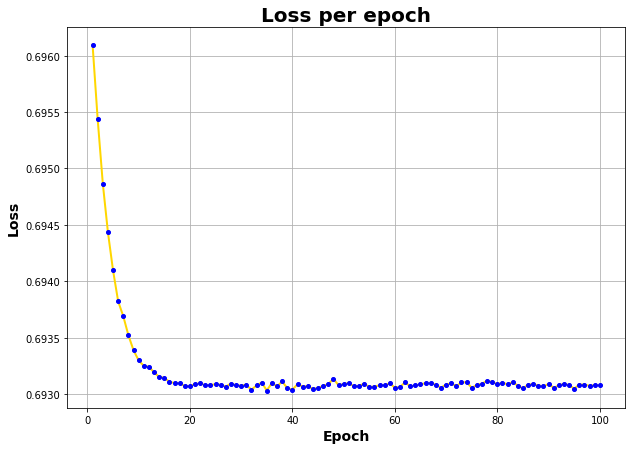

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# loading the data
raw = pd.read_csv('course-ml-data/Bike-Sharing-Dataset 2/day.csv')
##raw["cnt"].describe()
##The response variable is:
raw["success"] = raw["cnt"] > (raw["cnt"].describe()["mean"])
##raw.head()

##the requested features : 
x =  np.array(raw[['temp', 'atemp', 'hum', 'windspeed', 'weekday']].T)
y = np.array(raw['success'].astype('int64').values[np.newaxis, :])

##The architecture of the network :
nn = MyNN(0.001,  [5, 40, 30, 10, 7, 5, 3, 1])
batch_size=8
epochs = 100

epoch_arr=list(range(1,epochs+1))
loss_arr=train(x, y, epochs, batch_size)

plt.figure(figsize = (10, 7))
plt.plot(epoch_arr,loss_arr,'-o', color='gold', mfc='b', mec='b', markersize=4, linewidth=2, label='Loss')
plt.title('Loss per epoch', fontsize = 20, weight='bold')
plt.xlabel('Epoch', fontsize = 14, weight='bold')
plt.ylabel('Loss', fontsize = 14, weight='bold')
plt.grid();
plt.show();